Samples received: 1000


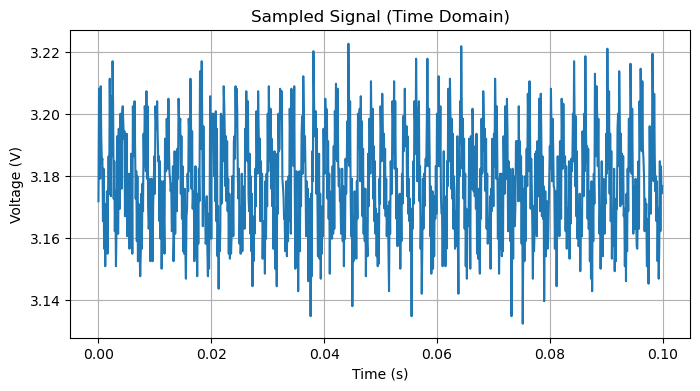

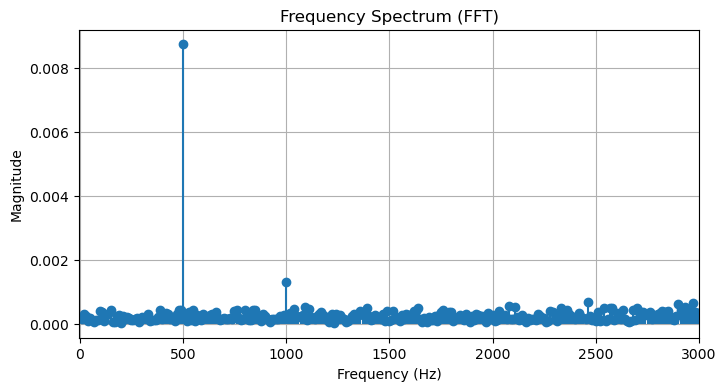

In [12]:
import serial
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

PORT = "COM4"       
BAUD = 115200

VREF = 3.3
ADC_MAX = 4095
FS = 10000           # Sampling frequency (Hz)

ser = serial.Serial(PORT, BAUD, timeout=2)

adc_data = []

while True:
    line = ser.readline().decode().strip()
    if line == "END":
        break
    if line.isdigit():
        adc_data.append(int(line))

ser.close()

adc = np.array(adc_data)
print("Samples received:", len(adc))

voltage = (adc / ADC_MAX) * VREF

t = np.arange(len(voltage)) / FS

plt.figure(figsize=(8,4))
plt.plot(t, voltage)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Sampled Signal (Time Domain)")
plt.grid()
plt.show()

N = len(voltage)
fft_vals = fft(voltage)
freqs = fftfreq(N, 1/FS)

# Keep positive frequencies
mask = freqs > 0
freqs = freqs[mask]
magnitude = np.abs(fft_vals[mask]) / N

plt.figure(figsize=(8,4))
plt.stem(freqs, magnitude, basefmt=" ")
plt.xlim(-2, 3000)   # Adjust if needed
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum (FFT)")
plt.grid()
plt.show()